In [35]:
#imports 
#load
#convert to pandas df
#display everything 
#standardizescaler (only the features not actual data) -> keep it as a seperate variable and still keep raw data 


In [36]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [37]:

# 1. Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_intelligence_dataset.csv")

for c in ['sale_date', 'last_purchase_date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sale_id             8000 non-null   object        
 1   customer_id         8000 non-null   object        
 2   product_id          8000 non-null   object        
 3   product_name        8000 non-null   object        
 4   category            8000 non-null   object        
 5   price               8000 non-null   int64         
 6   quantity            8000 non-null   int64         
 7   sale_date           8000 non-null   datetime64[ns]
 8   total_value         8000 non-null   int64         
 9   age                 8000 non-null   int64         
 10  gender              8000 non-null   object        
 11  region              8000 non-null   object        
 12  segment             8000 non-null   object        
 13  churn               8000 non-null   int64       

Shape of dataset: (8000, 18)

First 5 rows:
    sale_id customer_id product_id product_name     category  price  quantity  \
0  S000001   CUST01553       P004         Desk    Furniture  12000         2   
1  S000002   CUST00161       P010    Projector  Electronics  45000         2   
2  S000003   CUST00627       P010    Projector  Electronics  45000         4   
3  S000004   CUST01291       P009      Monitor  Electronics  12000         1   
4  S000005   CUST01456       P004         Desk    Furniture  12000         4   

   sale_date  total_value  age  gender region         segment  churn  \
0 2020-01-07        24000   40  Female   West  Small Business      1   
1 2023-11-10        90000   50  Female   West       Corporate      0   
2 2022-07-04       180000   33    Male  South       Corporate      0   
3 2023-10-18        12000   41    Male   West        Consumer      0   
4 2023-09-13        48000   60  Female   West        Consumer      0   

   tenure_months last_purchase_date      

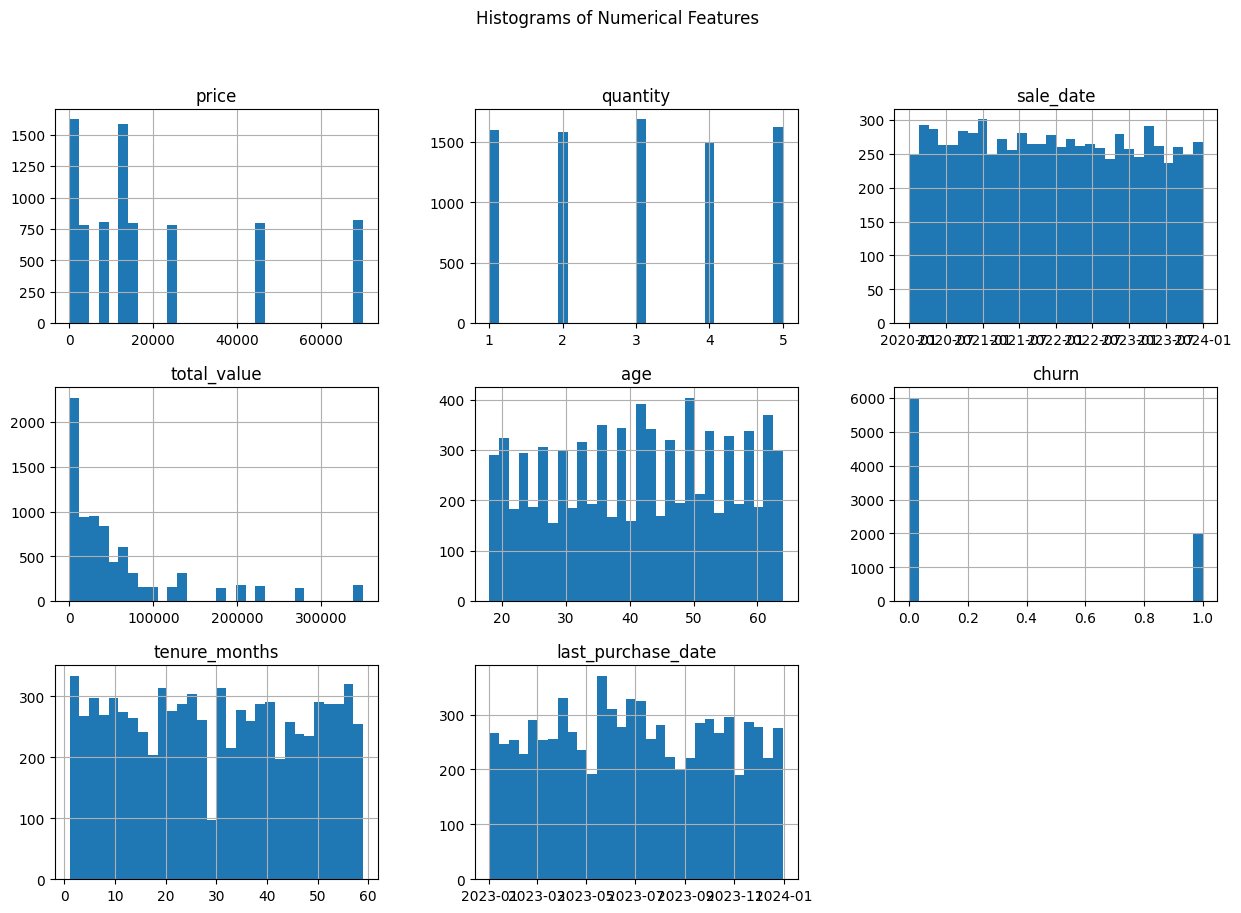

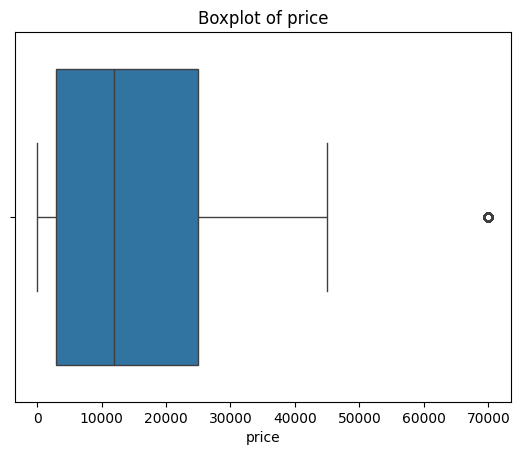

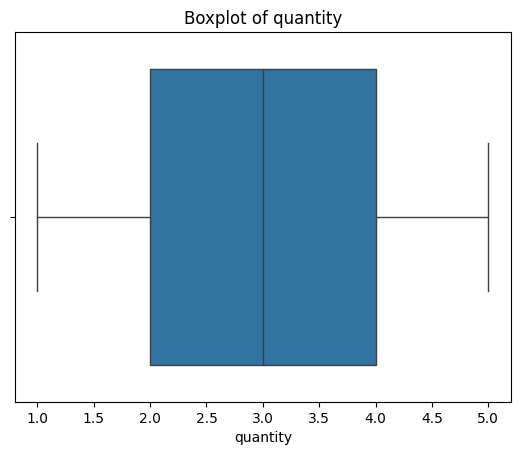

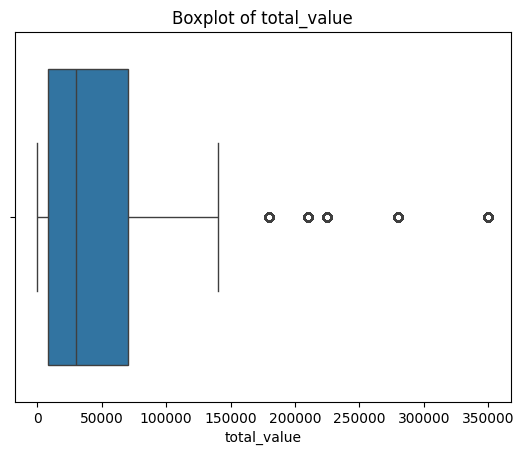

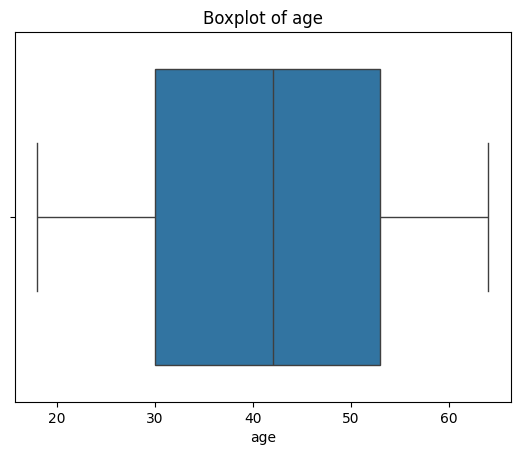

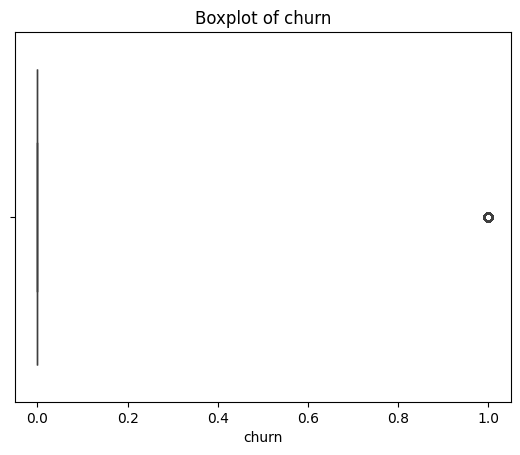

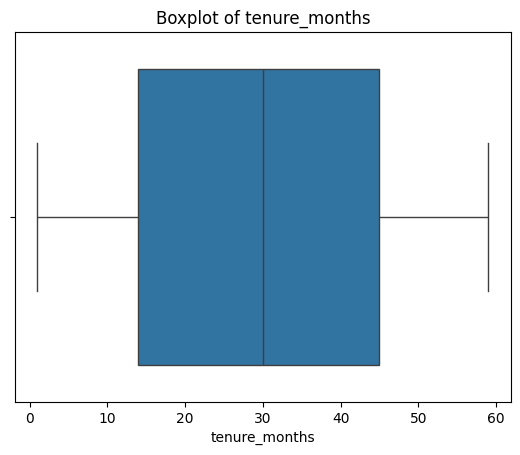

price: 817 outliers
quantity: 0 outliers
total_value: 830 outliers
age: 0 outliers
churn: 1985 outliers
tenure_months: 0 outliers


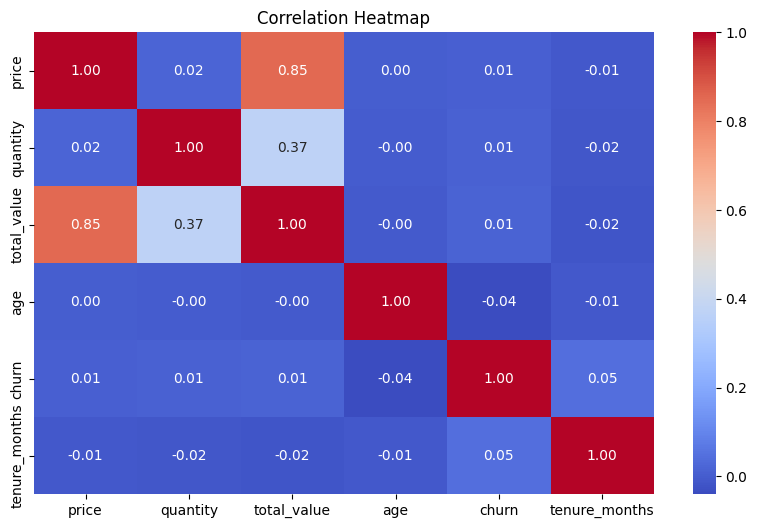

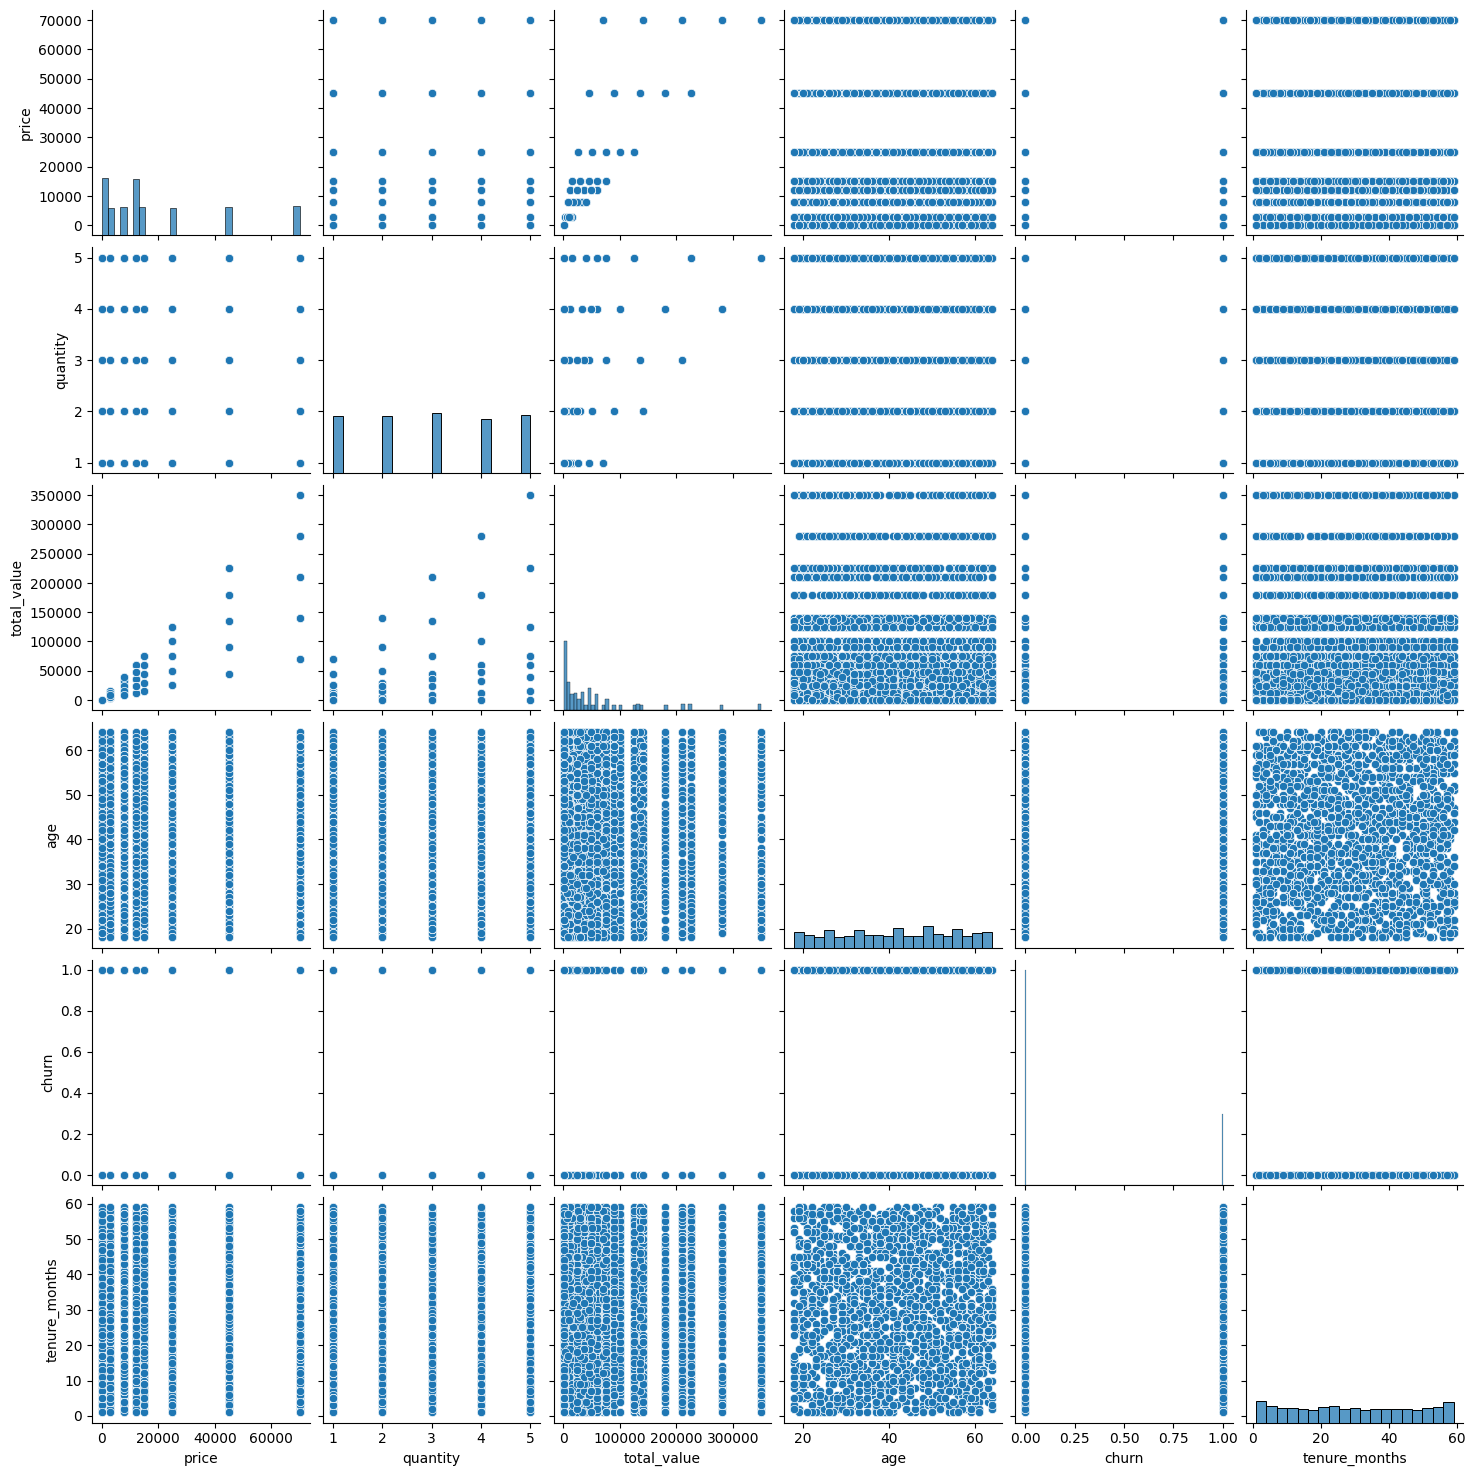

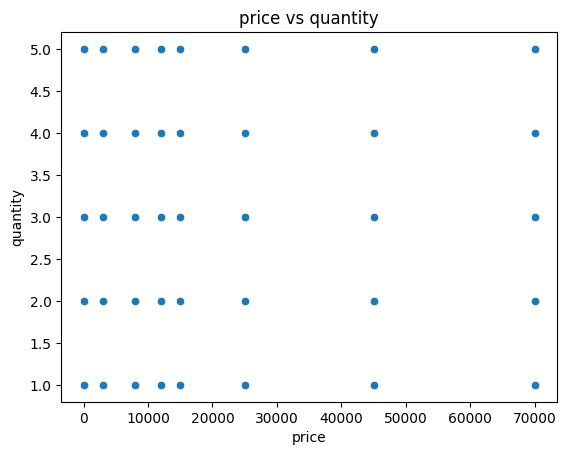

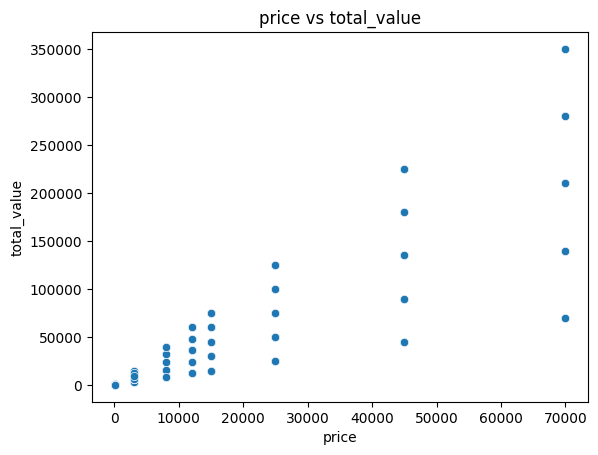

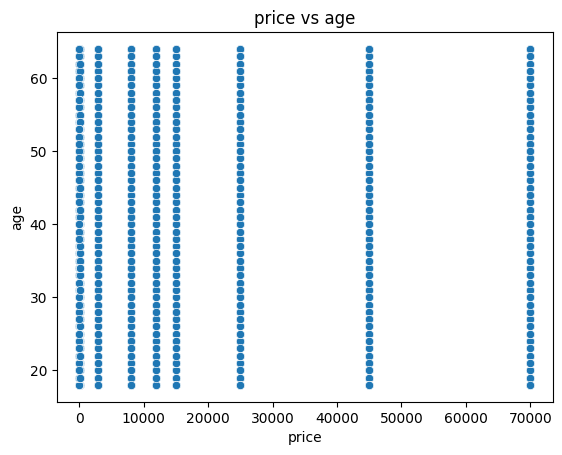

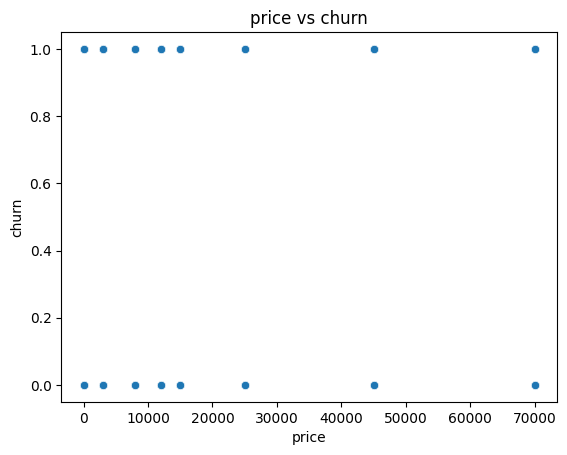

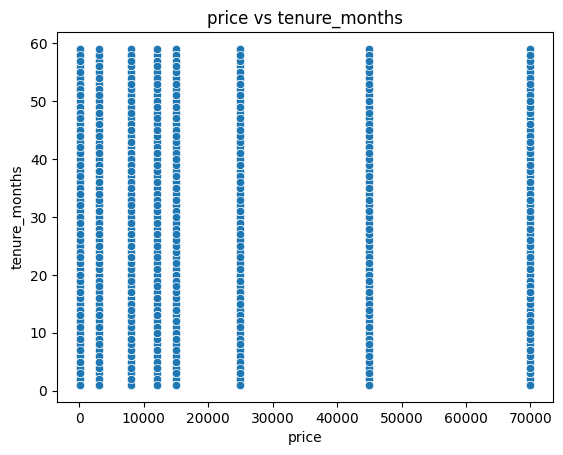


Average numerical features grouped by sale_id:
            price  quantity  total_value   age  churn  tenure_months
sale_id                                                            
S000001  12000.0       2.0      24000.0  40.0    1.0           37.0
S000002  45000.0       2.0      90000.0  50.0    0.0           44.0
S000003  45000.0       4.0     180000.0  33.0    0.0           25.0
S000004  12000.0       1.0      12000.0  41.0    0.0           56.0
S000005  12000.0       4.0      48000.0  60.0    0.0           52.0
...          ...       ...          ...   ...    ...            ...
S007996   8000.0       1.0       8000.0  18.0    0.0           17.0
S007997     50.0       3.0        150.0  59.0    1.0            5.0
S007998  45000.0       1.0      45000.0  32.0    0.0           14.0
S007999     50.0       1.0         50.0  53.0    0.0            5.0
S008000    100.0       1.0        100.0  22.0    0.0           23.0

[8000 rows x 6 columns]

Average numerical features grouped by cus

C:\Users\kashmala.arif\AppData\Local\Temp\ipykernel_11292\2936729318.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\nAverage numerical features grouped by {col}:\n", df.groupby(col)[num_cols].mean())
C:\Users\kashmala.arif\AppData\Local\Temp\ipykernel_11292\2936729318.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\nAverage numerical features grouped by {col}:\n", df.groupby(col)[num_cols].mean())
C:\Users\kashmala.arif\AppData\Local\Temp\ipykernel_11292\2936729318.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of 

In [38]:

# 3. Initial Inspection
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:\n", df.describe(include="all"))

# 4. Data Cleaning


# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill or drop missing values depending on context
# Example: fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Convert categorical columns to category type for efficiency
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].astype('category')



print("\nCleaned Data Info:")
print(df.info())

# 5. Univariate Analysis


# Histograms for numeric columns
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# 6. Outlier Detection


# Boxplots for numeric columns
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Using IQR Method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers")

# 7. Correlation Analysis
# -----------------------

corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for relationships (can be slow if too many features)
sns.pairplot(df[num_cols])
plt.show()

# 8. Bivariate Analysis
# ---------------------

# Scatterplots between numerical variables
for col in num_cols:
    if col != num_cols[0]:  # pick one variable as reference
        sns.scatterplot(data=df, x=num_cols[0], y=col)
        plt.title(f"{num_cols[0]} vs {col}")
        plt.show()

# Grouped summary stats for categorical variables
for col in cat_cols:
    print(f"\nAverage numerical features grouped by {col}:\n", df.groupby(col)[num_cols].mean())


In [39]:
df.to_csv("../customer_cleaned.csv")